How many clusters do you want to generate? (Choose between 1-50?) 10
How many iterations do you want to run? 2


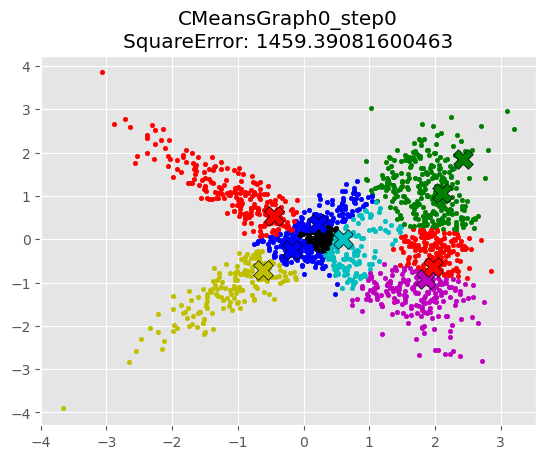

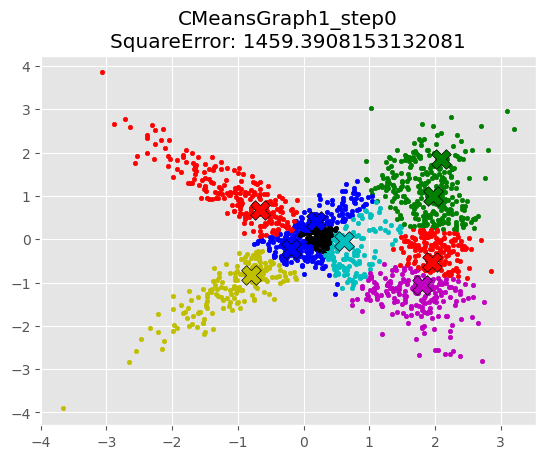

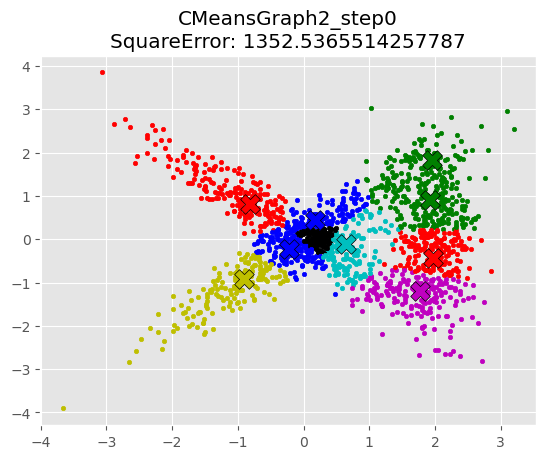

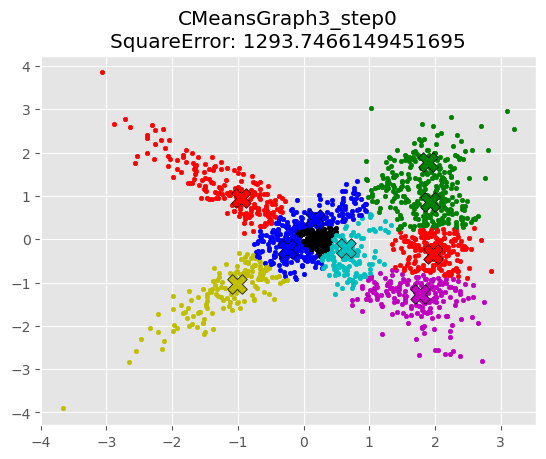

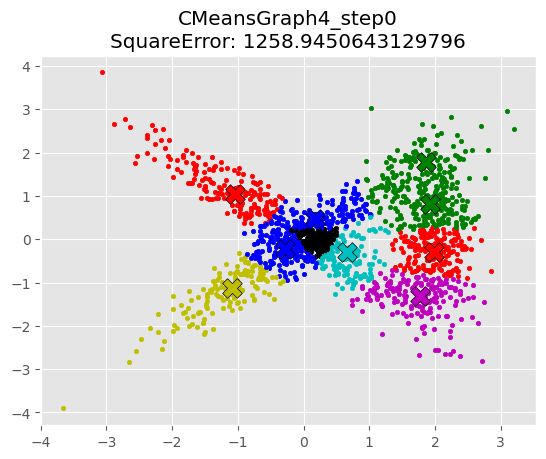

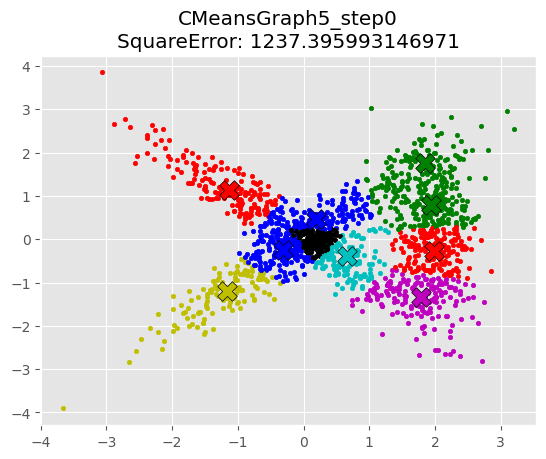

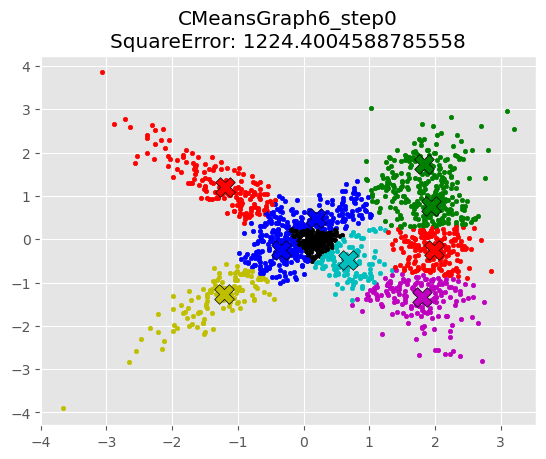

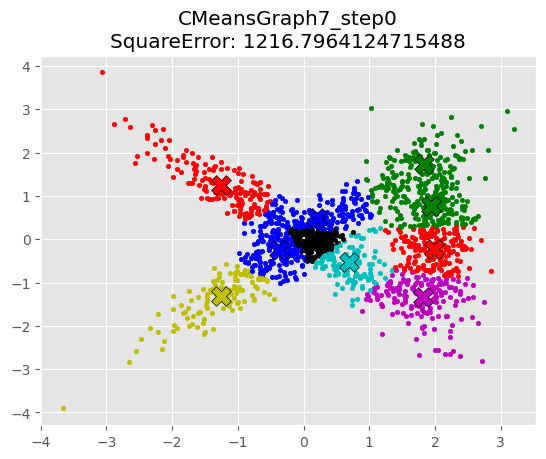

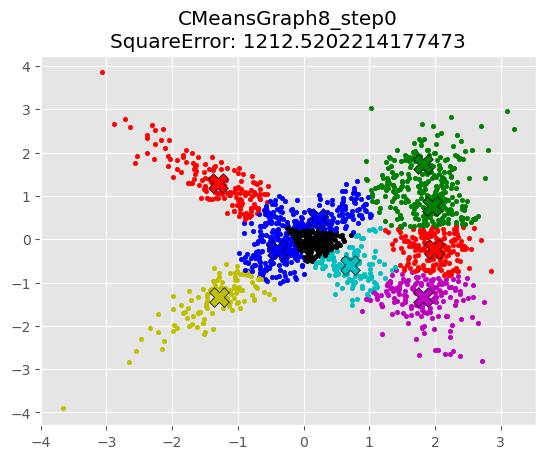

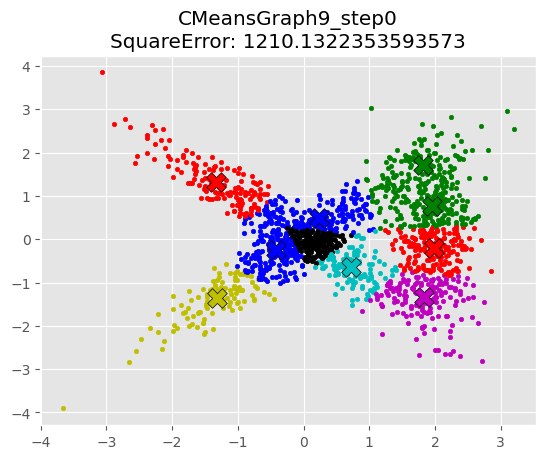

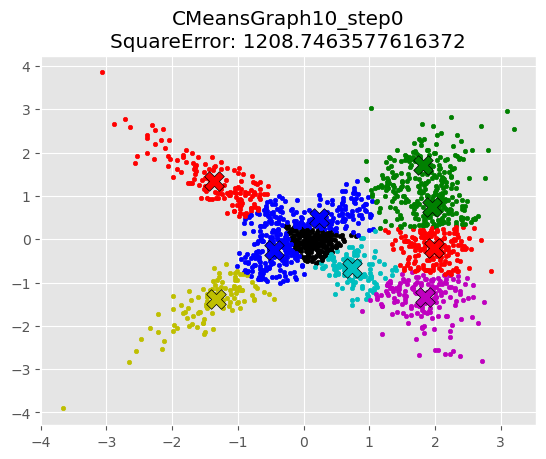

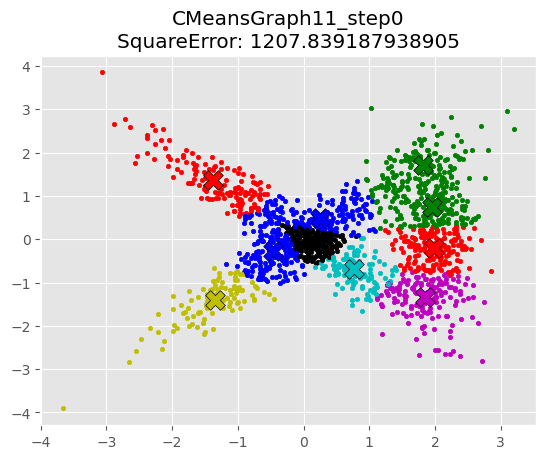

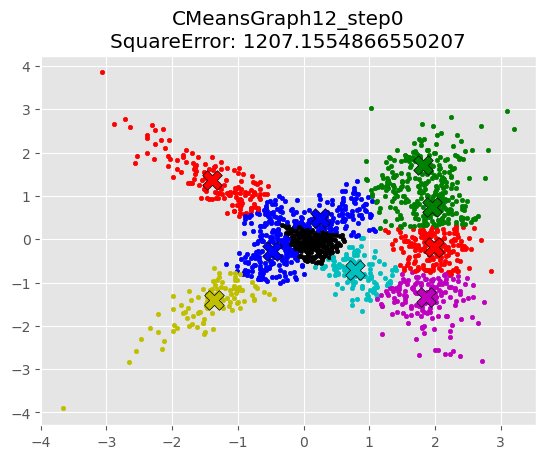

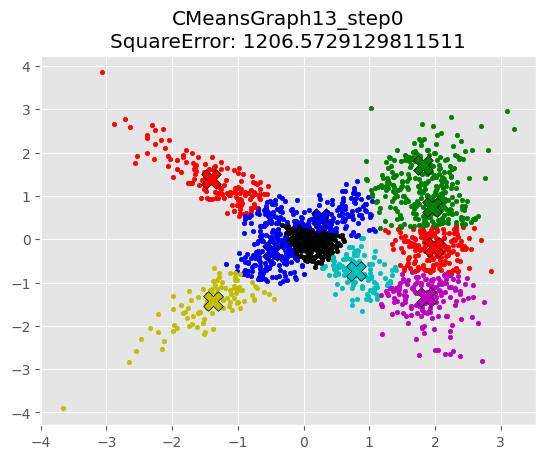

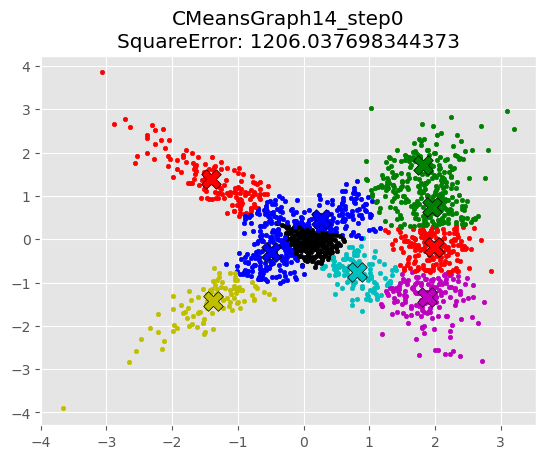

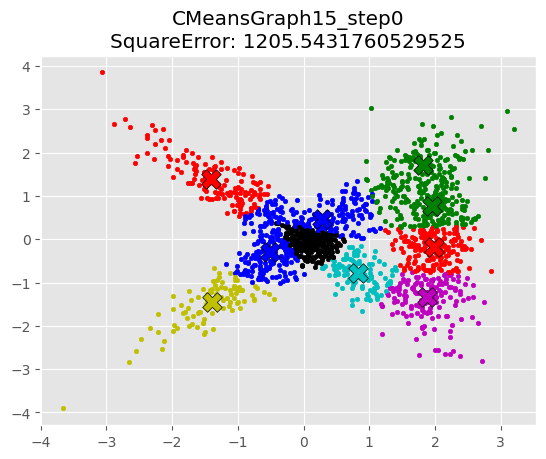

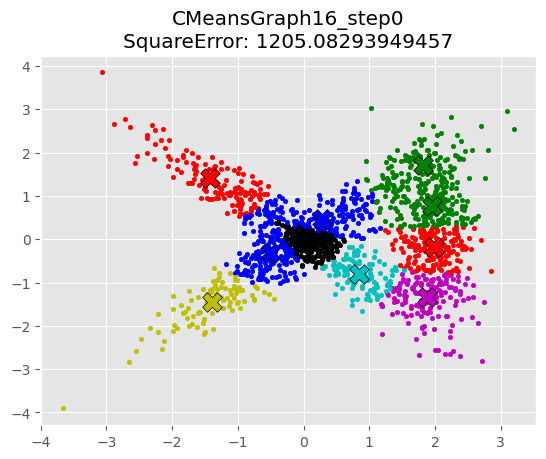

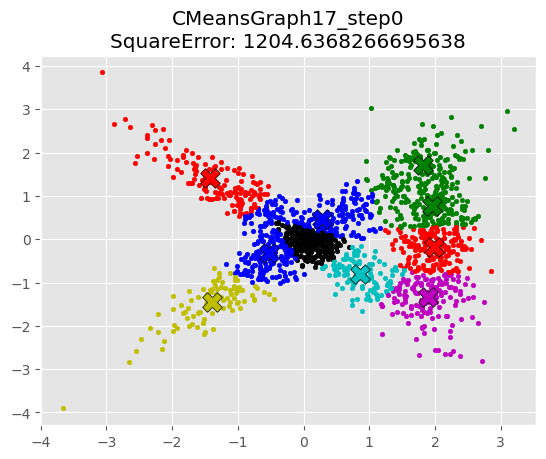

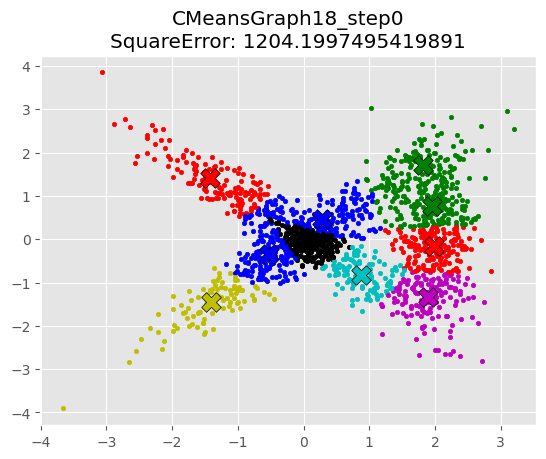

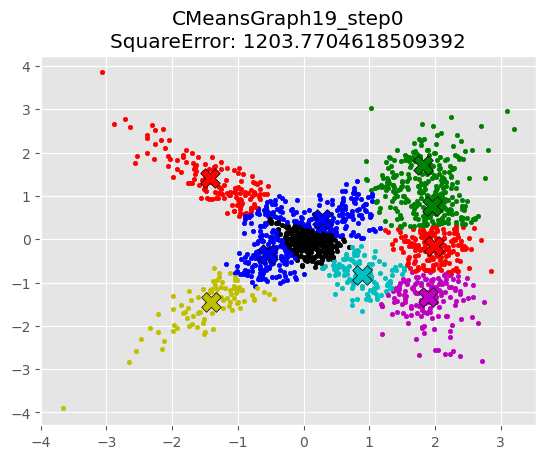

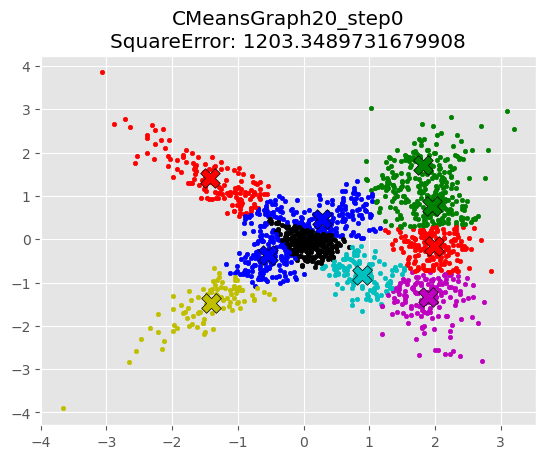

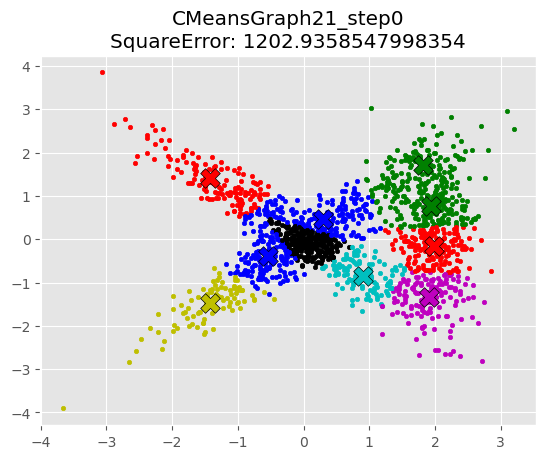

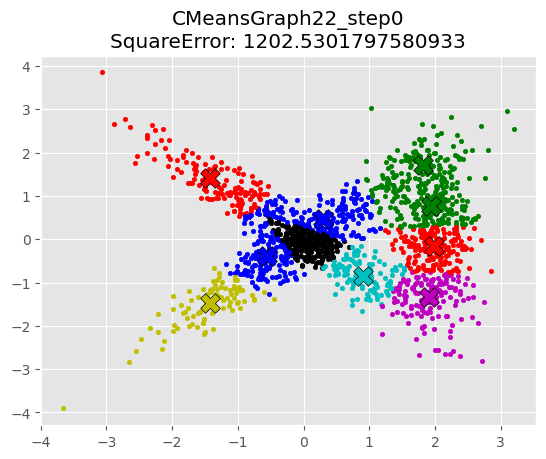

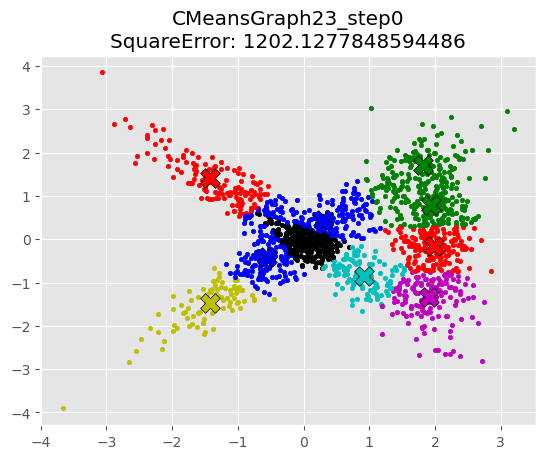

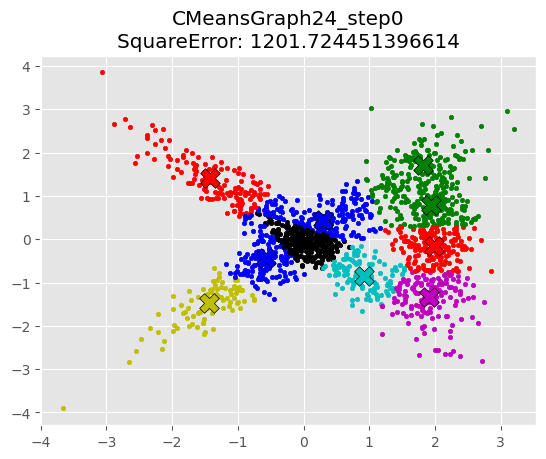

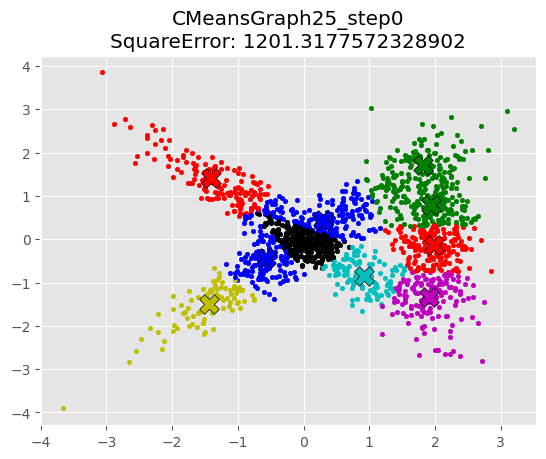

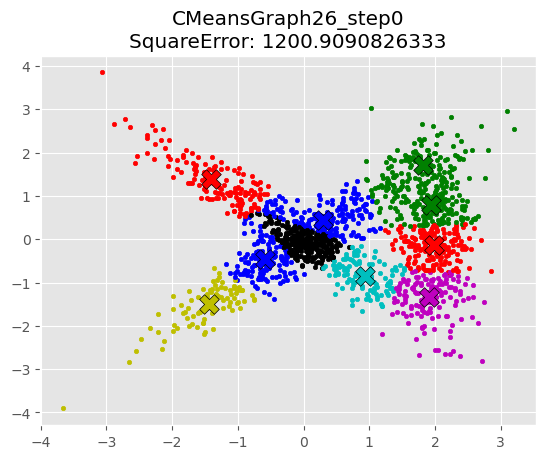

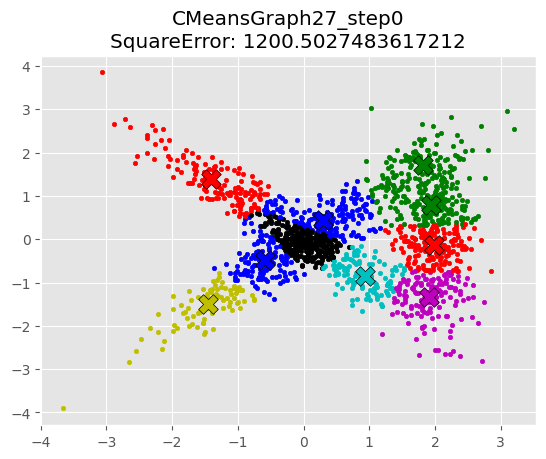

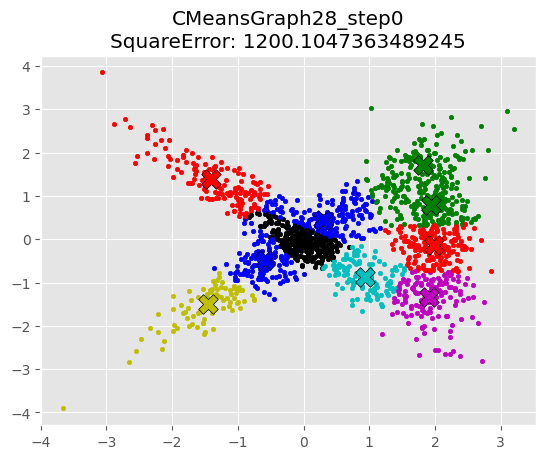

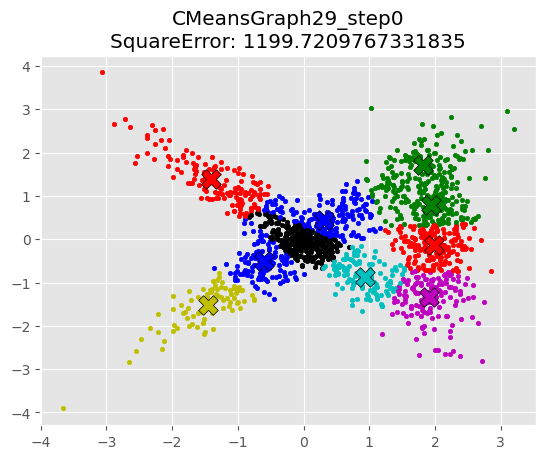

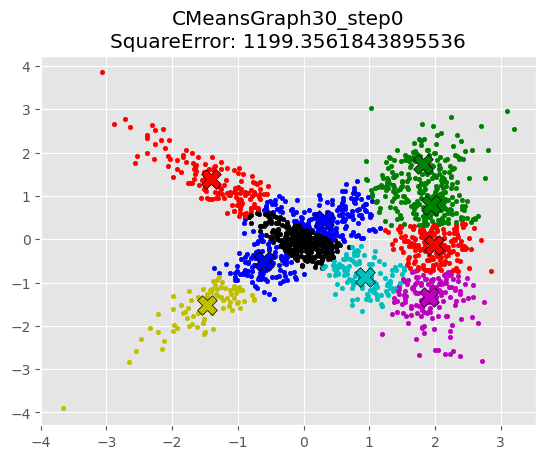

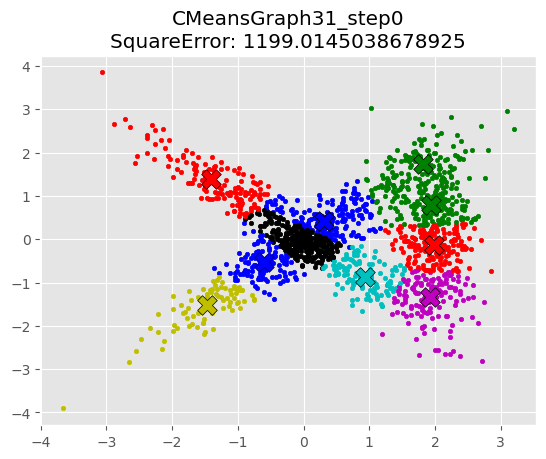

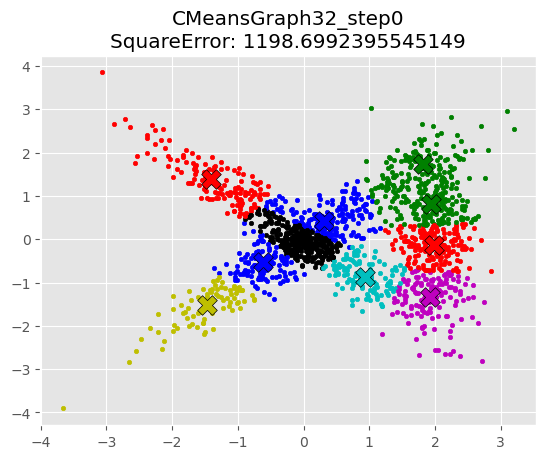

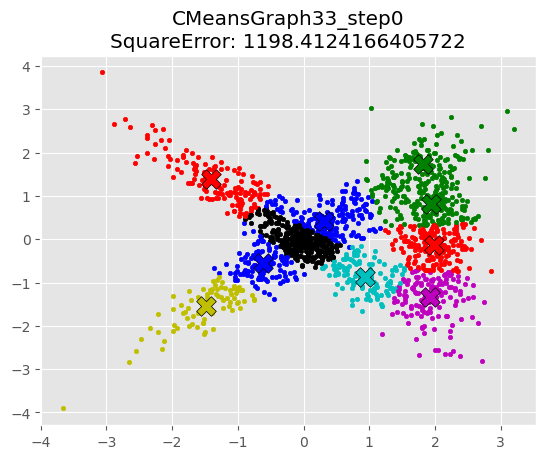

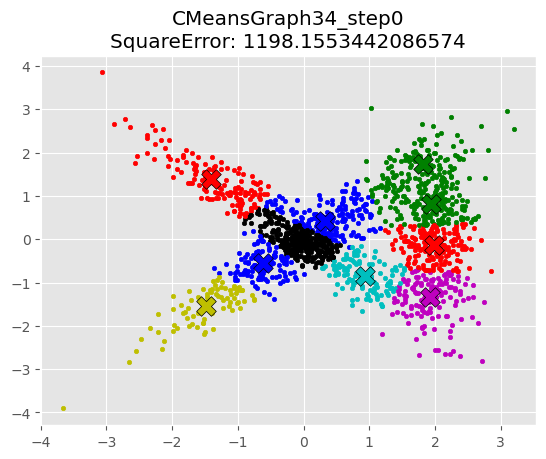

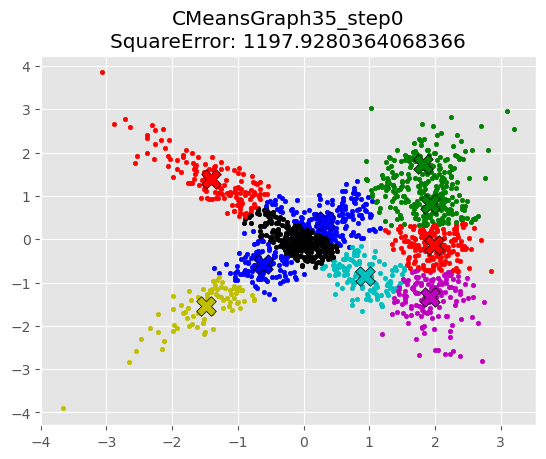

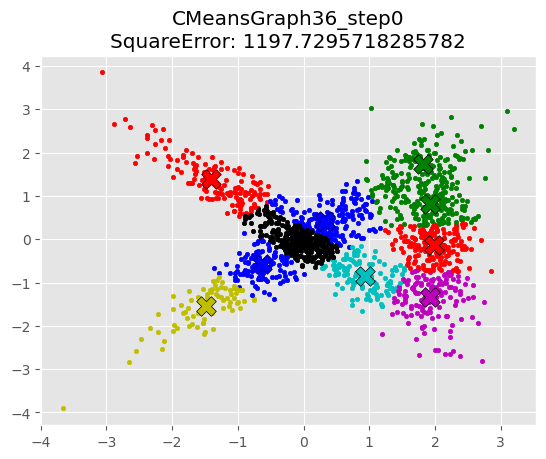

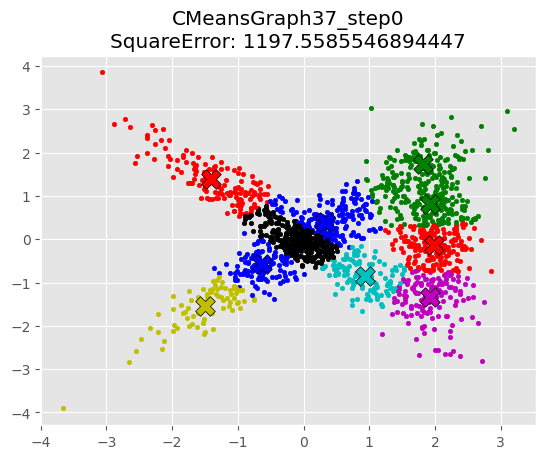

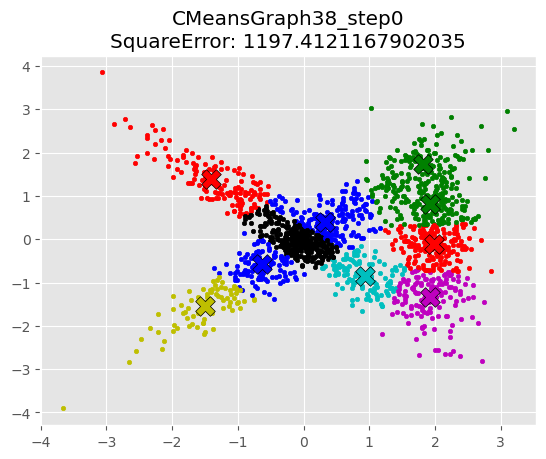

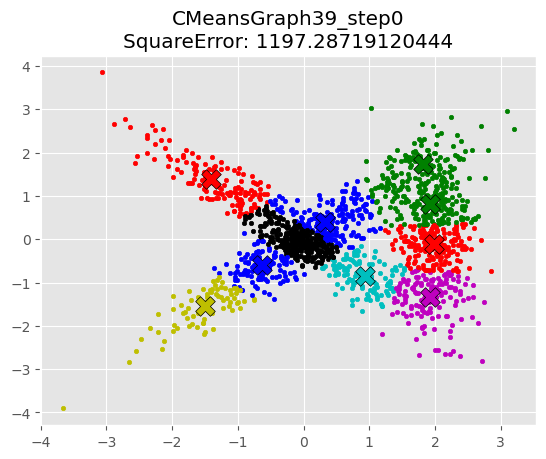

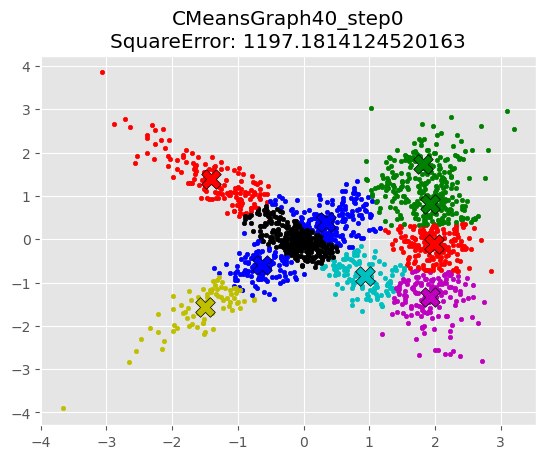

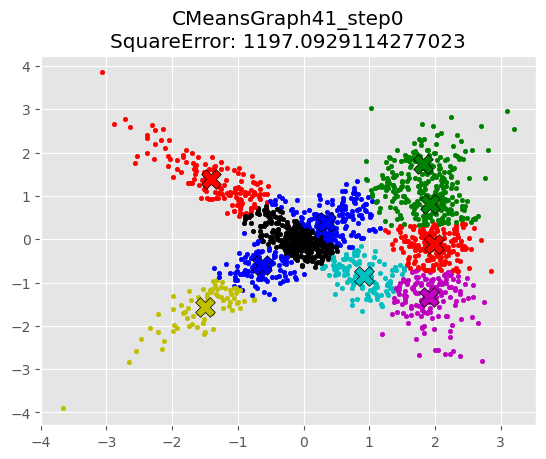

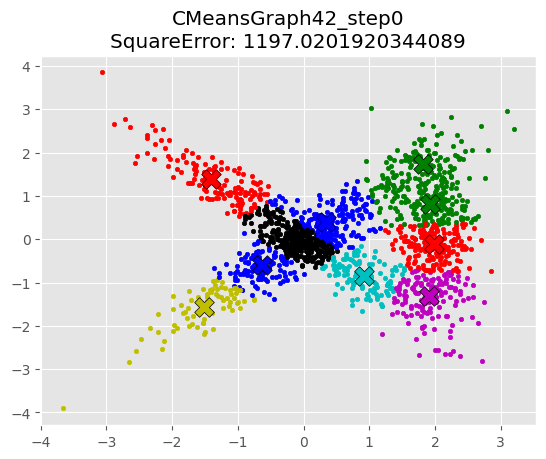

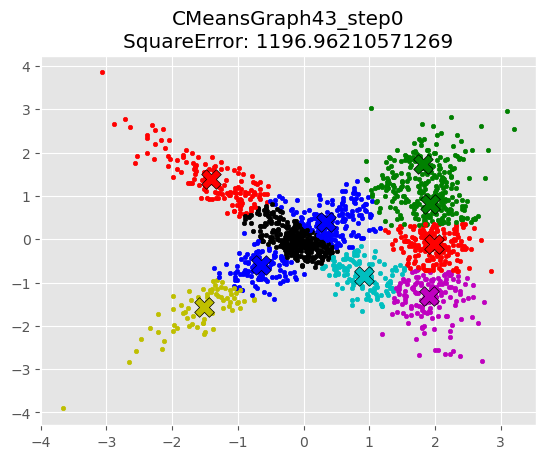

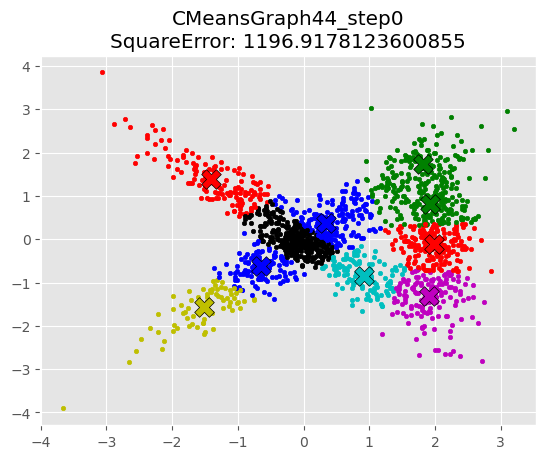

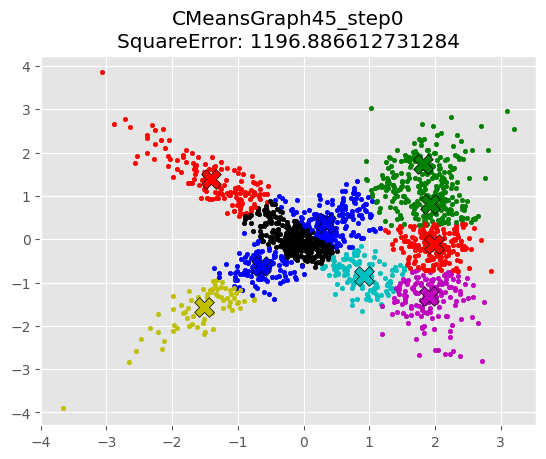

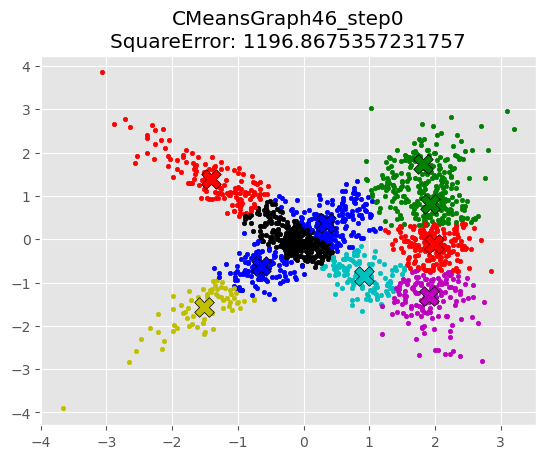

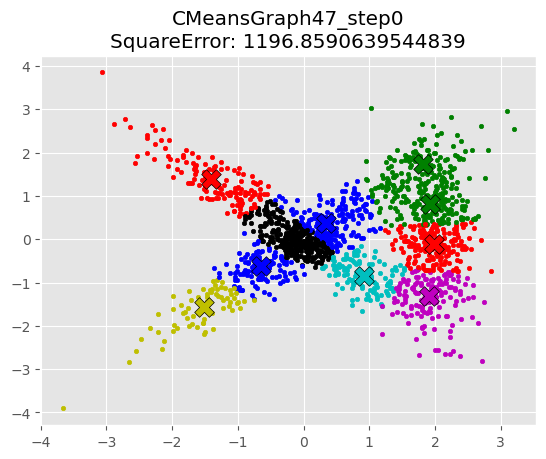

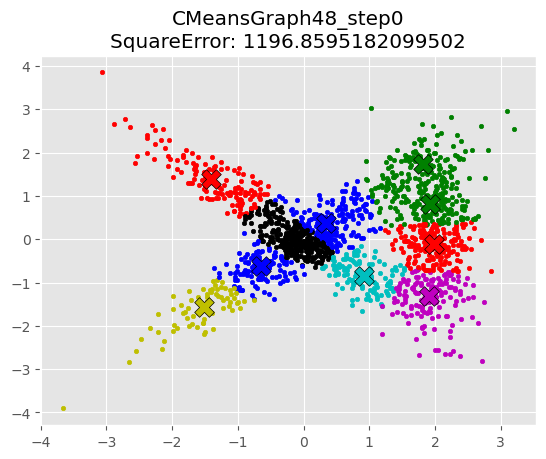

Epsilon reached, stopping early
New best square error: 1


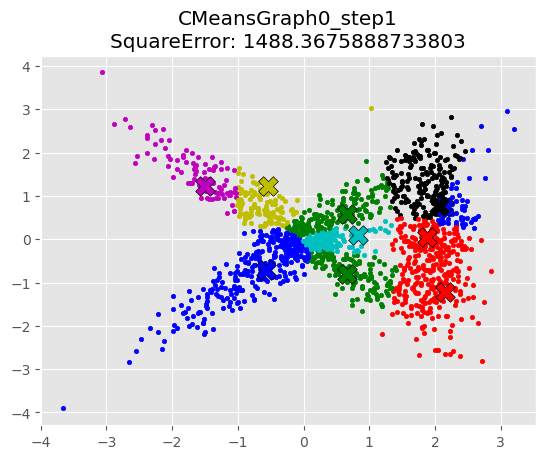

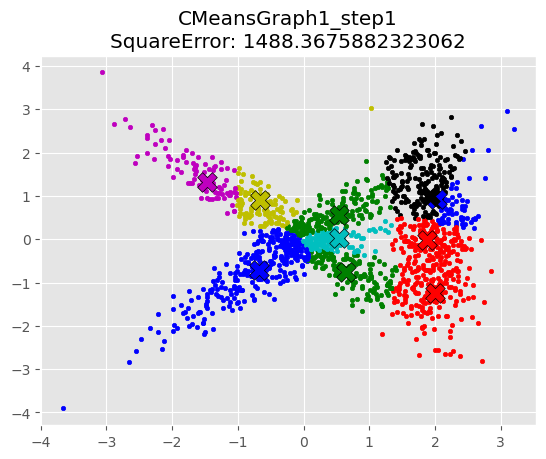

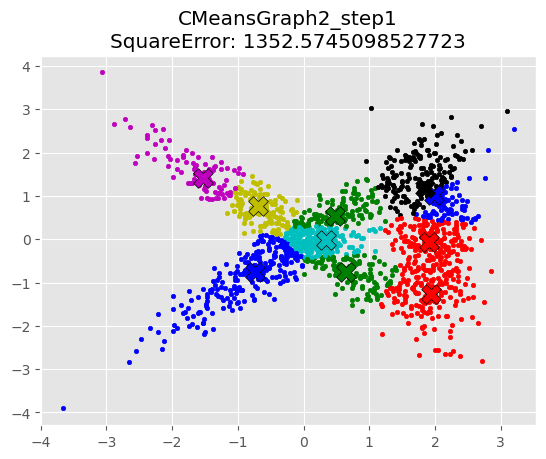

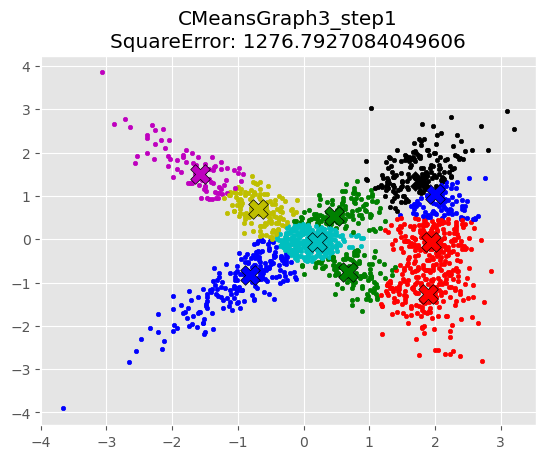

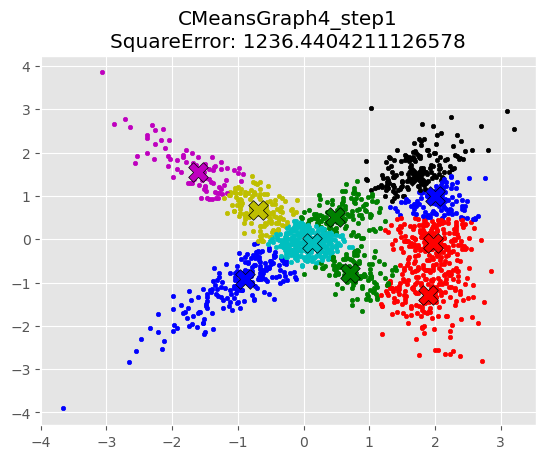

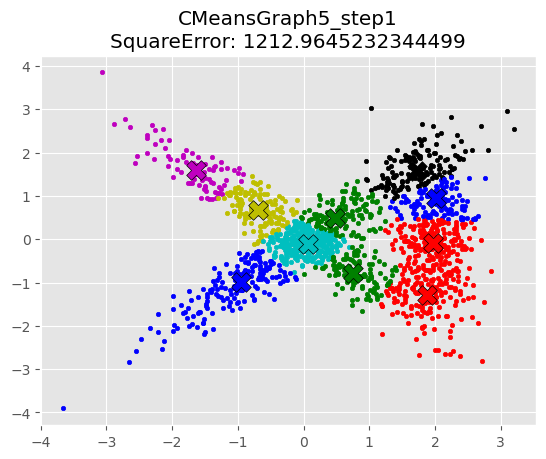

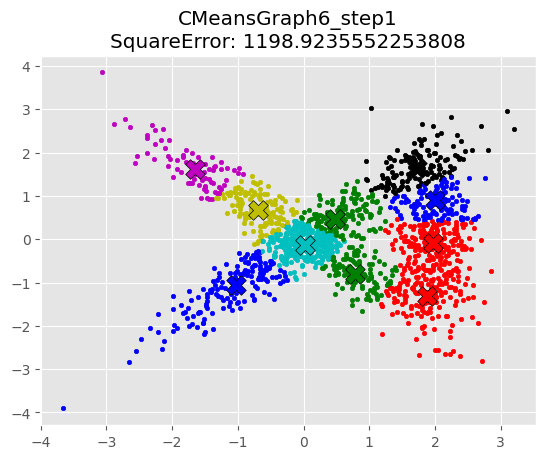

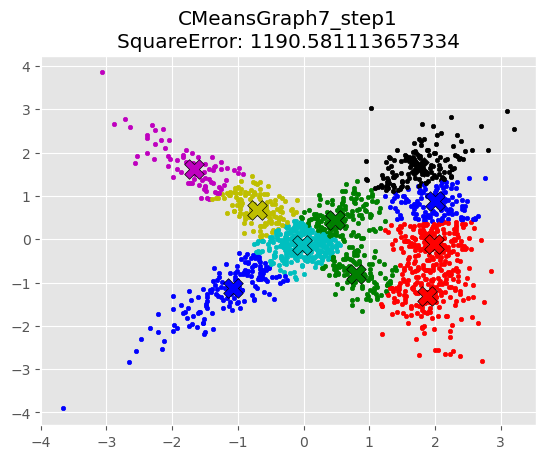

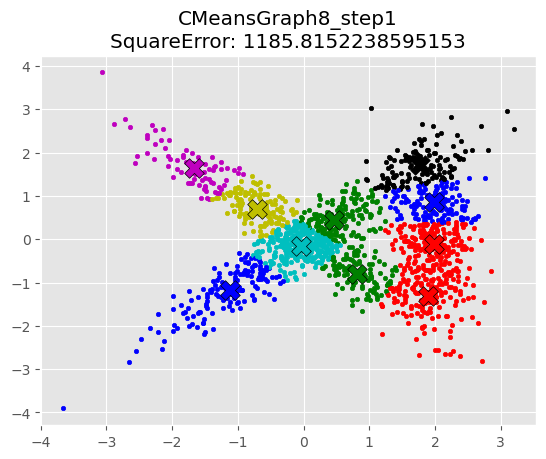

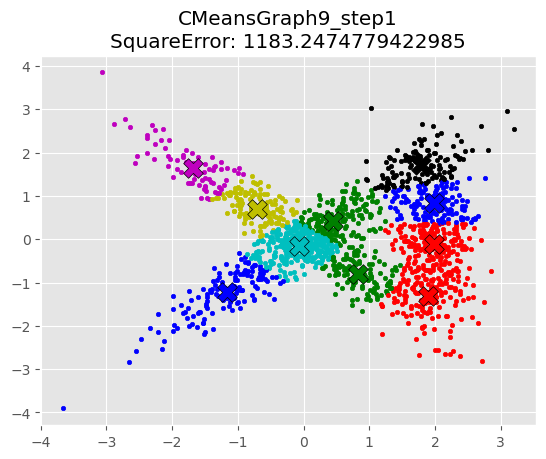

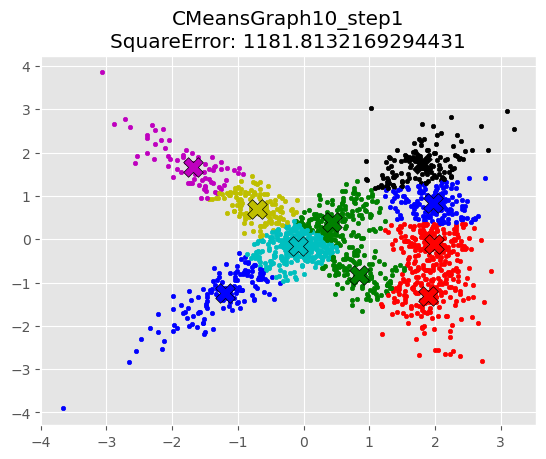

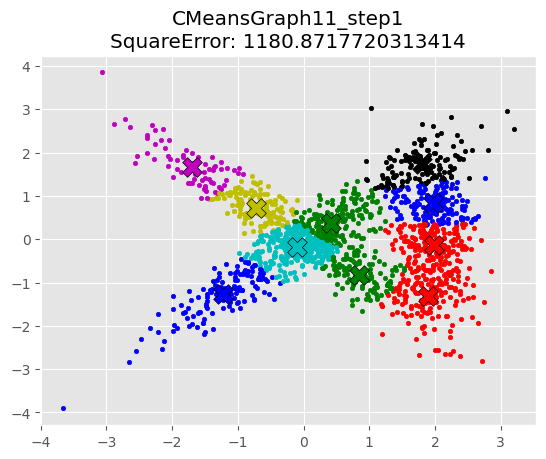

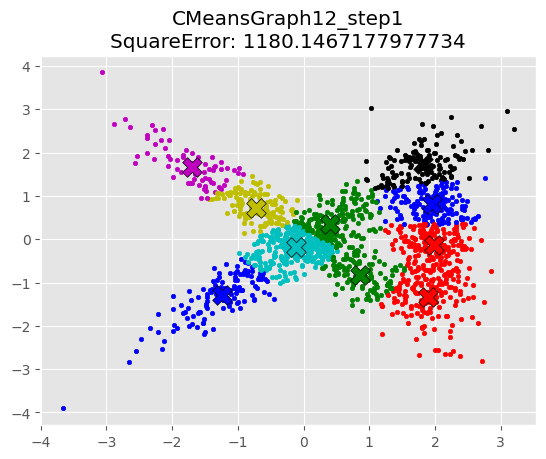

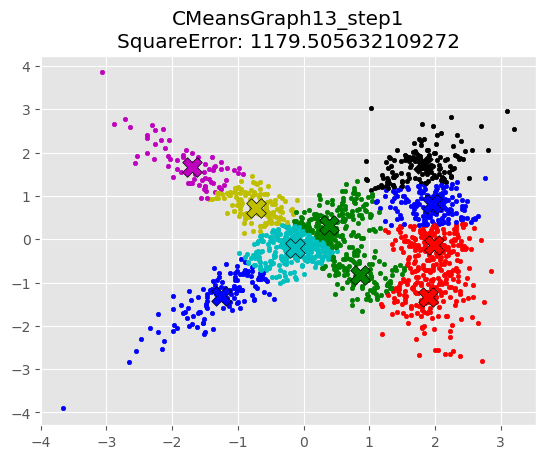

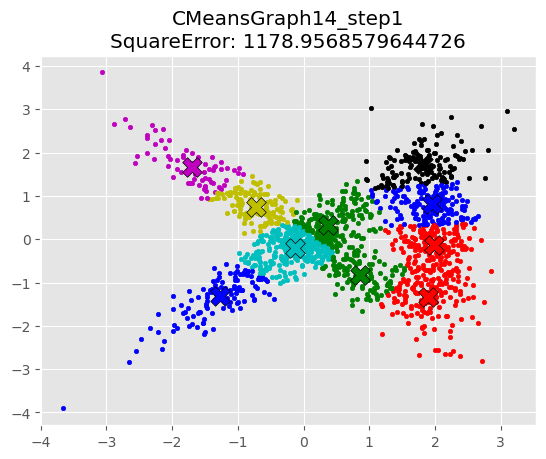

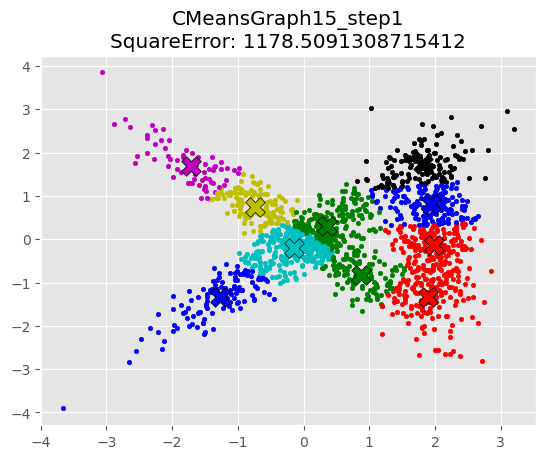

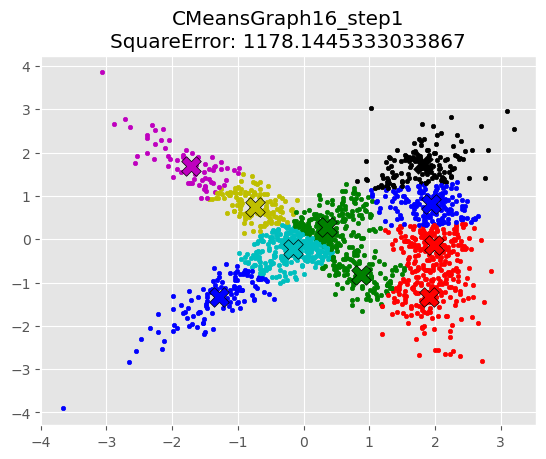

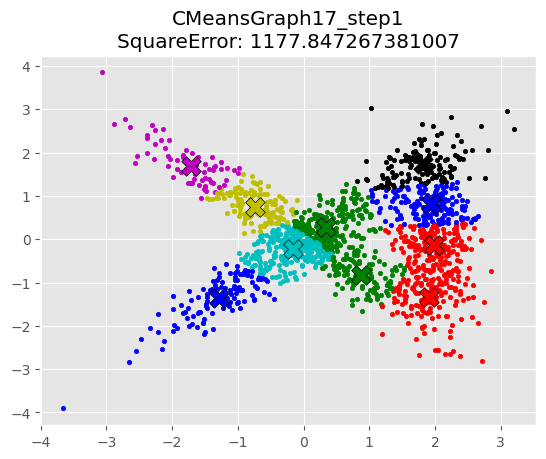

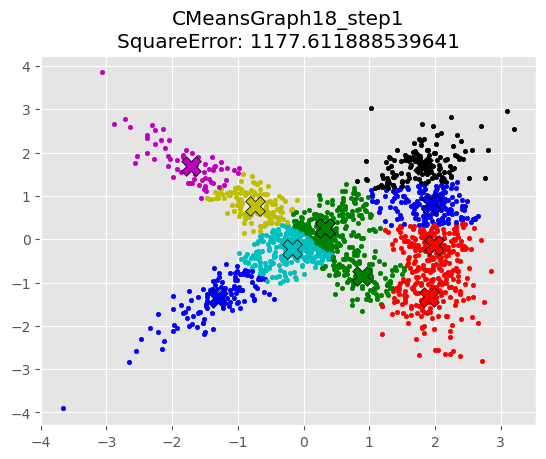

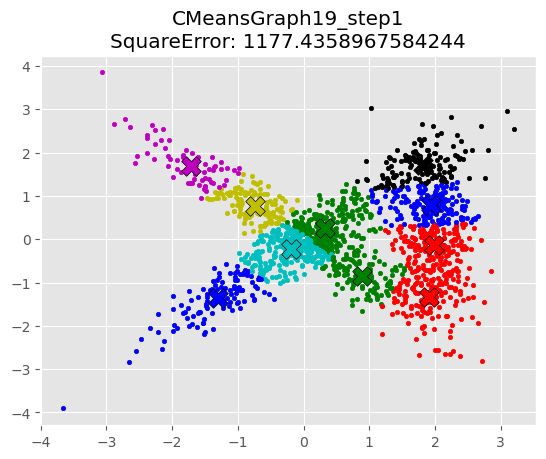

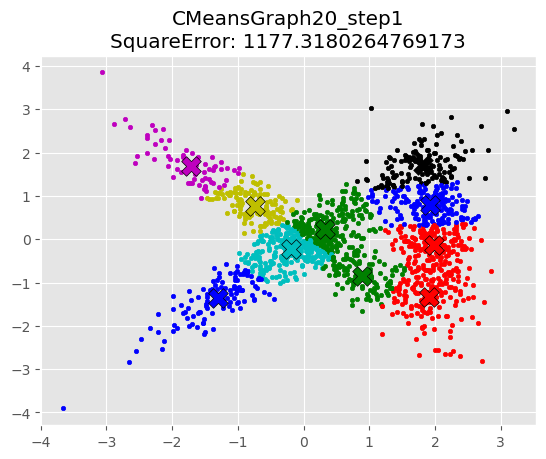

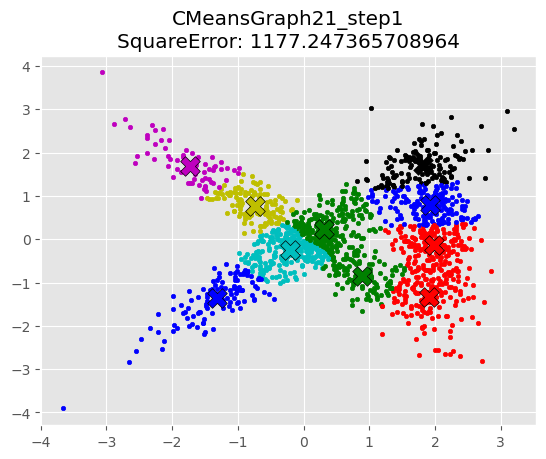

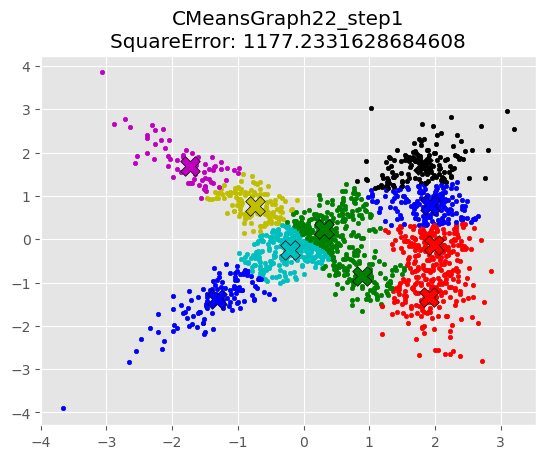

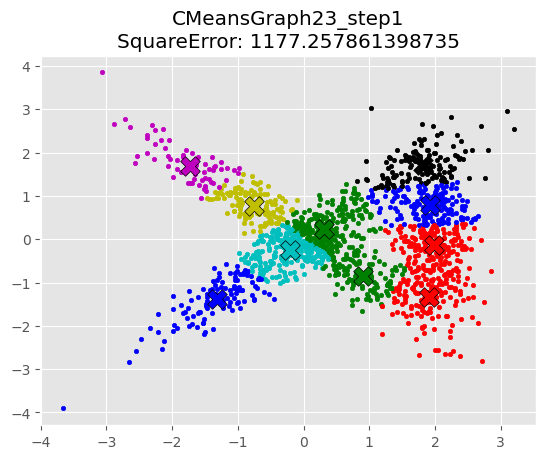

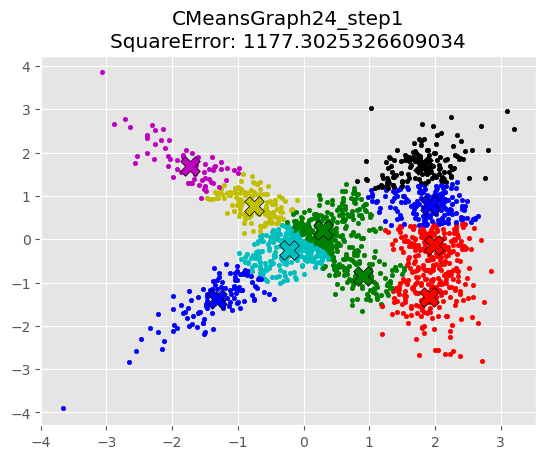

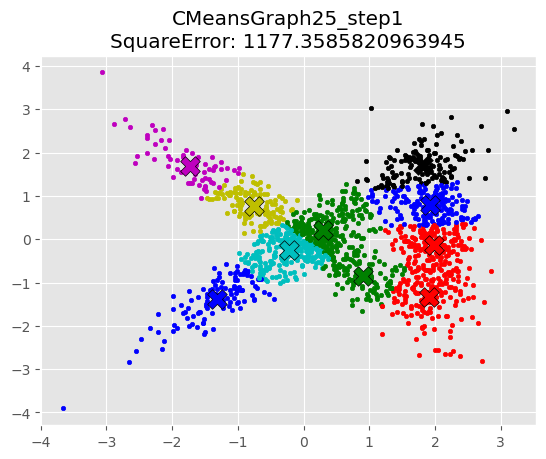

Epsilon reached, stopping early
New best square error: 2
All squareErrors sums:
[1196.8595182099502, 1177.3585820963945]
Best squareError sum:
1177.3585820963945
The best graph is:


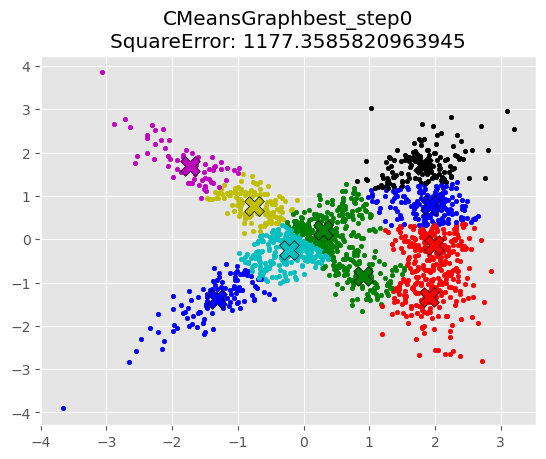

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt
plt.style.use('ggplot')

class FuzzyCluster:
    def __init__(self):
        self.cluster_centers = []
        self.memberships = []
        self.error_history = []
        self.optimal_centers = []
        self.optimal_memberships = []
        self.minimal_error = float('inf')
        self.fuzziness = 2
        self.current_error = 0
        self.tolerance = 0.001
        self.color_palette = ['r', 'g', 'b', 'm', 'c', 'k', 'y'] * 10

    def display_errors(self):
        print("All error sums over iterations:")
        print(self.error_history)
        print("Minimal error sum encountered:")
        print(self.minimal_error)

    def evaluate_errors(self):
        self.error_history.append(self.current_error)
        if self.current_error < self.minimal_error:
            self.minimal_error = self.current_error
            self.optimal_centers = self.cluster_centers.copy()
            self.optimal_memberships = self.memberships.copy()
            print("New lowest error sum found:", self.minimal_error)

    def initialize_memberships(self, data_points, num_clusters):
        self.memberships = []
        for _ in range(len(data_points)):
            weights = random.sample(range(1, 1000), num_clusters)
            total = sum(weights)
            self.memberships.append([weight / total for weight in weights])

    def update_centers(self, data_points, num_clusters):
        self.cluster_centers = [[0, 0] for _ in range(num_clusters)]
        for cluster_index in range(num_clusters):
            num = den = 0
            for data_index, data_point in enumerate(data_points):
                weight = self.memberships[data_index][cluster_index] ** self.fuzziness
                num += weight * data_point
                den += weight
            self.cluster_centers[cluster_index] = [num / den, num / den] if den else [0, 0]

    def update_memberships(self, data_points, num_clusters):
        for data_index, data_point in enumerate(data_points):
            for cluster_index in range(num_clusters):
                num = self.cost_function(data_point, self.cluster_centers[cluster_index])
                den = sum((num / self.cost_function(data_point, center)) ** (2 / (self.fuzziness - 1))
                          for center in self.cluster_centers)
                self.memberships[data_index][cluster_index] = 1 / den if den else 0
                self.current_error += num * self.memberships[data_index][cluster_index]

    def cost_function(self, point, center):
        return sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)

    def select_initial_centers(self, num_clusters, upper_bound, data_points):
        selected_indices = random.sample(range(0, upper_bound), num_clusters)
        self.cluster_centers = [data_points[i] for i in selected_indices]

    def plot_clusters(self, data_points, iteration, step):
        plt.figure()
        for i, point in enumerate(data_points):
            plt.scatter(*point, color=self.color_palette[np.argmax(self.memberships[i])])
        for center in self.cluster_centers:
            plt.scatter(*center, s=200, color='black', marker='X')
        plt.title(f"Clustering Progress at Iteration {iteration}, Step {step}")
        plt.show()

    def run_clustering(self, iterations, num_clusters, data_points, max_steps):
        self.select_initial_centers(num_clusters, len(data_points), data_points)
        for iteration in range(iterations):
            for step in range(max_steps):
                self.update_memberships(data_points, num_clusters)
                self.update_centers(data_points, num_clusters)
                if step % 10 == 0:  # Optionally display progress every 10 steps
                    self.plot_clusters(data_points, iteration, step)
                self.evaluate_errors()
            if abs(self.previous_error - self.current_error) <= self.tolerance:
                print("Convergence reached.")
                break
        print("Final clustering achieved.")
        self.display_errors()

def main():
    fuzzy = FuzzyCluster()
    with open("/content/545_cluster_dataset programming 3.txt", 'r') as file:
        data = [list(map(float, line.strip().split())) for line in file.readlines()]
    clusters = int(input("Enter the number of clusters to generate (1-50): "))
    iterations = int(input("Enter the number of iterations to run: "))
    fuzzy.run_clustering(iterations, clusters, data, 100)

if __name__ == "__main__":
    main()
